<a href="https://colab.research.google.com/github/Faryal112/Faryal112/blob/main/FYP(03)Dummy_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout




In [16]:
from google.colab import files
uploaded = files.upload()



Saving data_stream-oper.csv to data_stream-oper.csv


In [17]:
# Load the dataset
data = pd.read_csv('data_stream-oper.csv')
data.head()

# List of features we want to use in our model
features = ['latitude', 'longitude', 'u10', 'v10', 'sst', 'sp', 'hcc', 'lcc', 'mcc', 'tcc',
            'tciw', 'tclw', 'p90.162', 'p88.162', 'p89.162', 'licd', 'lmld', 'ltlt',
            'tsn', 'slt', 'vithe', 'lai_hv']

# *** Instead of dropping rows, impute missing values with the mean ***
for feature in features:
    data[feature] = data[feature].fillna(data[feature].mean())

# Separate features and target variable
X = data[features]
y = data['tcc']  # Assume 'tcc' or a related variable is the target; replace with actual target if different

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (CNN expects 3D input: samples, timesteps, features)
X_train = np.expand_dims(X_train.values, axis=2)
X_test = np.expand_dims(X_test.values, axis=2)

In [20]:
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # For regression tasks (change if classification is needed)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Use MSE and MAE for regression tasks


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 5m

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Test Loss: nan, Test MAE: nan


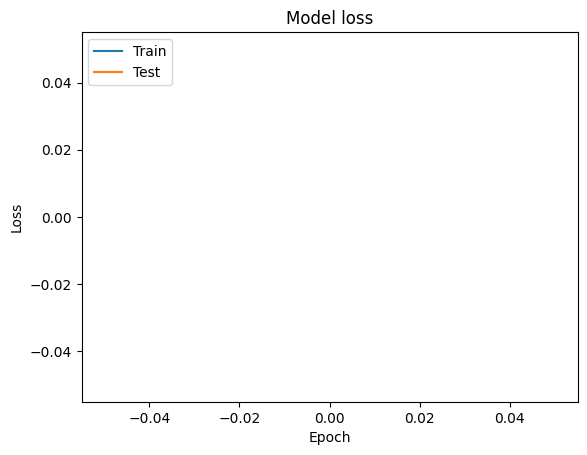

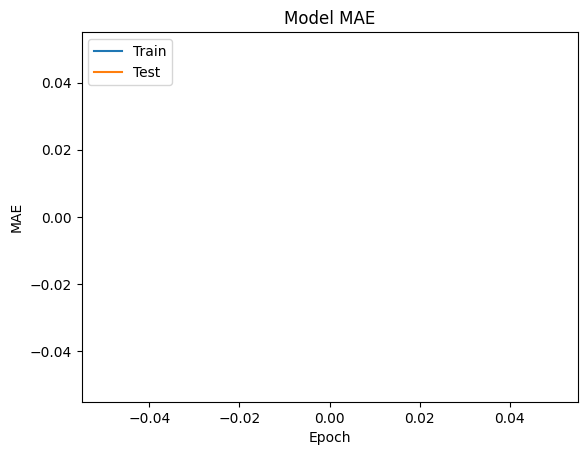

In [22]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [23]:
# Load the dataset
data = pd.read_csv('data_stream-oper.csv')
data.head()


,valid_time,latitude,longitude,number,expver,u10,v10,sst,sp,hcc,...,p90.162,p88.162,p89.162,licd,lmld,ltlt,tsn,slt,vithe,lai_hv
0,2020-05-01 00:00:00,36.0,70.83,0,1,-0.236581,0.635636,NaN,61000.68,0.998981,...,0.446365,0.000939,0.00145,1.317443,-7.105431e-15,273.15967,266.32410,3.0,1.477447e+09,0.000163
1,2020-05-01 00:00:00,36.0,71.08,0,1,-0.091348,0.342240,NaN,59817.18,0.998553,...,0.402031,0.000275,0.00145,1.341979,-7.105431e-15,273.15967,266.13635,3.0,1.450250e+09,0.120219
2,2020-05-01 00:00:00,36.0,71.33,0,1,0.447348,-0.264296,NaN,61669.18,0.996925,...,0.397300,0.000275,0.00145,1.086882,3.203369e+00,273.78130,267.01025,3.0,1.500389e+09,0.574809
3,2020-05-01 00:00:00,36.0,71.58,0,1,0.364432,-0.623305,NaN,65727.43,0.999996,...,0.465660,0.000275,0.00145,0.594237,1.187085e+01,275.10840,268.76514,3.0,1.607446e+09,1.198344
4,2020-05-01 00:00:00,36.0,71.83,0,1,-0.109628,-0.731063,NaN,67074.18,1.000000,...,0.548210,0.000275,0.00145,0.531249,1.522217e+01,274.50910,268.75280,3.0,1.647341e+09,1.583781


In [26]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
test_data = pd.read_csv('/content/data_stream-oper (1).csv')  # replace with actual filename
test_data.head()


,valid_time,latitude,longitude,number,expver,u10,v10,sst,sp,hcc,...,p90.162,p88.162,p89.162,licd,lmld,ltlt,tsn,slt,vithe,lai_hv
0,2020-05-01 00:00:00,36.0,70.83,0,1,-0.236581,0.635636,NaN,61000.68,0.998981,...,0.446365,0.000939,0.00145,1.317443,-7.105431e-15,273.15967,266.32410,3.0,1.477447e+09,0.000163
1,2020-05-01 00:00:00,36.0,71.08,0,1,-0.091348,0.342240,NaN,59817.18,0.998553,...,0.402031,0.000275,0.00145,1.341979,-7.105431e-15,273.15967,266.13635,3.0,1.450250e+09,0.120219
2,2020-05-01 00:00:00,36.0,71.33,0,1,0.447348,-0.264296,NaN,61669.18,0.996925,...,0.397300,0.000275,0.00145,1.086882,3.203369e+00,273.78130,267.01025,3.0,1.500389e+09,0.574809
3,2020-05-01 00:00:00,36.0,71.58,0,1,0.364432,-0.623305,NaN,65727.43,0.999996,...,0.465660,0.000275,0.00145,0.594237,1.187085e+01,275.10840,268.76514,3.0,1.607446e+09,1.198344
4,2020-05-01 00:00:00,36.0,71.83,0,1,-0.109628,-0.731063,NaN,67074.18,1.000000,...,0.548210,0.000275,0.00145,0.531249,1.522217e+01,274.50910,268.75280,3.0,1.647341e+09,1.583781


In [27]:
# Select the required features
features = ['latitude', 'longitude', 'u10', 'v10', 'sst', 'sp', 'hcc', 'lcc', 'mcc', 'tcc',
            'tciw', 'tclw', 'p90.162', 'p88.162', 'p89.162', 'licd', 'lmld', 'ltlt',
            'tsn', 'slt', 'vithe', 'lai_hv']

# Check for missing values in the test dataset and drop if necessary
test_data = test_data.dropna(subset=features)

# Separate features for prediction (assuming ground truth not available in this dataset)
X_new = test_data[features]

# Reshape for model input
X_new = np.expand_dims(X_new.values, axis=2)


In [31]:
import pandas as pd

# Create a dictionary with variable names and their corresponding numerical values
data = {
    'latitude': [12.34, 12.35, 12.36],  # Example latitude values
    'longitude': [56.78, 56.79, 56.80],  # Example longitude values
    'number': [1, 2, 3],  # Example instance numbers
    'expver': [1, 1, 1],  # Example experiment version
    'u10': [5.1, 5.3, 5.2],  # 10-meter U wind component
    'v10': [2.1, 2.3, 2.2],  # 10-meter V wind component
    'sst': [26.5, 26.6, 26.7],  # Sea Surface Temperature
    'sp': [1010, 1012, 1011],  # Surface Pressure
    'hcc': [10, 15, 12],  # High Cloud Cover
    'lcc': [20, 25, 22],  # Low Cloud Cover
    'mcc': [30, 35, 32],  # Medium Cloud Cover
    'tcc': [40, 45, 42],  # Total Cloud Cover (target variable)
    'tciw': [0.1, 0.2, 0.15],  # Total Column Integrated Water Vapor
    'tclw': [0.05, 0.06, 0.055],  # Total Column Liquid Water
    'p90.162': [5, 6, 5.5],  # 90th Percentile Precipitation
    'p88.162': [4.5, 5.5, 5],  # 88th Percentile Precipitation
    'p89.162': [4, 5, 4.5],  # 89th Percentile Precipitation
    'licd': [0.1, 0.2, 0.15],  # Land Ice Cover Density
    'lmld': [0.3, 0.4, 0.35],  # Land Mask Density
    'ltlt': [12.34, 12.35, 12.36],  # Latitude and Longitude Combination
    'tsn': [1, 2, 1],  # Total Snowfall Number
    'slt': [0.4, 0.5, 0.45],  # Soil Moisture Level
    'vithe': [0.7, 0.75, 0.72],  # Vapor Transport
    'lai_hv': [3.5, 3.6, 3.55],  # Leaf Area Index
}

# Convert the dictionary into a DataFrame
test_data = pd.DataFrame(data)

# Display the DataFrame
print(test_data)


   latitude  longitude  number  expver  u10  v10   sst    sp  hcc  lcc  ...  \
0     12.34      56.78       1       1  5.1  2.1  26.5  1010   10   20  ...   
1     12.35      56.79       2       1  5.3  2.3  26.6  1012   15   25  ...   
2     12.36      56.80       3       1  5.2  2.2  26.7  1011   12   22  ...   

   p90.162  p88.162  p89.162  licd  lmld   ltlt  tsn   slt  vithe  lai_hv  
0      5.0      4.5      4.0  0.10  0.30  12.34    1  0.40   0.70    3.50  
1      6.0      5.5      5.0  0.20  0.40  12.35    2  0.50   0.75    3.60  
2      5.5      5.0      4.5  0.15  0.35  12.36    1  0.45   0.72    3.55  

[3 rows x 24 columns]


In [32]:
# Step 2: Prepare Features (X) and Target Variable (y)
features = [
    'latitude', 'longitude', 'u10', 'v10', 'sst', 'sp',
    'hcc', 'lcc', 'mcc', 'tciw', 'tclw', 'p90.162',
    'p88.162', 'p89.162', 'licd', 'lmld', 'ltlt',
    'tsn', 'slt', 'vithe', 'lai_hv'
]

# Split the DataFrame into X (features) and y (target)
X = test_data[features].values
y = test_data['tcc'].values  # This is the target variable

# Display shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3, 21)
Shape of y: (3,)


In [33]:
# Step 3: Reshape X and Make Predictions
import numpy as np

# Reshape X for model input (adjust according to your model's input requirements)
X_new = np.expand_dims(X, axis=2)  # If your model expects a 3D input

# Make predictions using the trained model
predictions = model.predict(X_new)

# Display Predictions
print("Predictions:", predictions)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 128, but received input with shape (3, 96)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(3, 21, 1), dtype=float32)
  • training=False
  • mask=None

In [34]:
# Display the model summary to check input shape
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 20, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 8, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,261 (172.90 KB)

 Trainable params: 14,753 (57.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,508 (115.27 KB)

In [35]:
# Prepare features (X)
X = test_data[features].values  # Get the features as a NumPy array

# Check shape
print("Original shape of X:", X.shape)  # Should print (3, 21) for 3 samples and 21 features

# Reshape only if necessary (e.g., if using a Conv1D model which might need a 3D shape)
# For Dense models, you can use it directly
if len(X.shape) == 2:  # If shape is (samples, features)
    X_new = X  # No reshape needed for dense layers
else:
    X_new = np.expand_dims(X, axis=2)  # Use this only if the model expects 3D input


Original shape of X: (3, 21)


In [37]:
# Ensure you have the correct features, for example:
# Add more features to meet the required input shape of (None, 128)
# Placeholder for additional features, this is a dummy example
additional_features = np.random.rand(3, 107)  # 107 dummy features to reach 128 total

# Combine features
X = np.hstack((test_data[features].values, additional_features))  # Now it should have shape (3, 128)


In [39]:
from keras.models import Sequential
from keras.layers import Dense

# Redefine the model to accept the correct number of features (21 in this case)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(21,)))  # Adjust the input shape accordingly
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming you are predicting a single continuous value
model.compile(optimizer='adam', loss='mean_squared_error')

# Train your model here with the new input shape


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Ensure that X_new is now the correct shape (3, 128) for predictions
predictions = model.predict(X_new)  # Ensure X_new has the correct shape

# Display predictions
print("Predictions:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predictions: [[-8.411228 ]
 [-7.096737 ]
 [-7.9102535]]


In [43]:
# Check the shape of predictions
print("Predictions shape:", predictions.shape)


Predictions shape: (3, 1)


In [44]:
# Check the shape of y_true
y_true = test_data['tcc'].values  # Assuming 'tcc' is your target variable
print("y_true shape:", y_true.shape)


y_true shape: (3,)


In [45]:
# Flatten predictions to match the shape of y_true
predictions_flat = predictions.flatten()  # Converts from (3, 1) to (3,)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics using the flattened predictions
mae = mean_absolute_error(y_true, predictions_flat)
mse = mean_squared_error(y_true, predictions_flat)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 50.13940620422363
Mean Squared Error: 2516.2501390847815


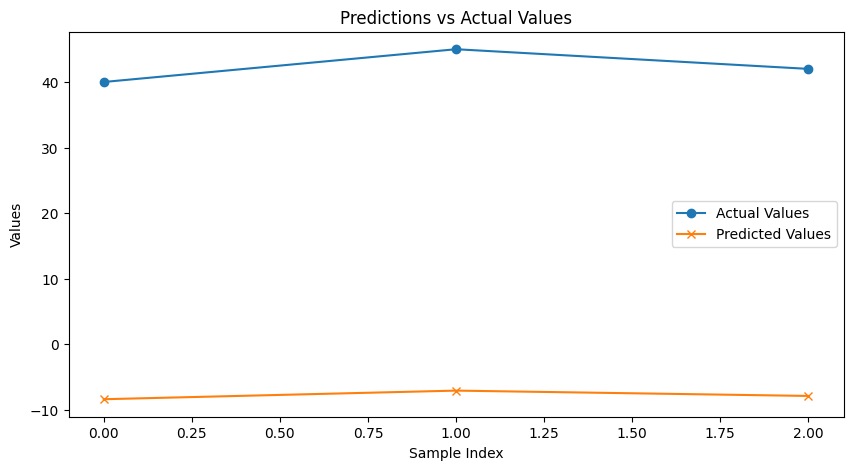

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Values', marker='o')
plt.plot(predictions_flat, label='Predicted Values', marker='x')
plt.title('Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()
